In [1]:
#%run ./common-code.ipynb

%run ./FATAL_data_count.ipynb

[ContentFile(path="D2-documentation"), ContentFile(path="DATA"), ContentFile(path="README.md"), ContentFile(path="scripts")]
ContentFile(path="D2-documentation")
ContentFile(path="DATA")
ContentFile(path="README.md")
ContentFile(path="scripts")
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/FATAL_all.csv
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/NF_AGE_14to15_all.csv
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/NF_AGE_16to19_all.csv
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/NF_AGE_20to24_all.csv
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/NF_AGE_25to34_all.csv
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/NF_AGE_35to44_all.csv
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/NF_AGE_45to54_all.csv
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-da

193040 ['Sociologists'] [0 0 0 0 0 0 0 0]
193041 ['Sociologists'] [0 0 0 0 0 0 0 0]
193050 ['Urban and Regional Planners'] [0 0 0 0 0 0 0 0]
193051 ['Urban and Regional Planners'] [0 1 0 0 0 0 0 0]
193090 ['Miscellaneous Social Scientists and Related Workers'] [0 0 0 0 0 0 0 0]
193091 ['Anthropologists and Archeologists'] [0 0 0 0 0 0 0 0]
193092 ['Geographers'] [0 0 0 0 0 0 0 0]
193093 ['Historians'] [0 0 0 0 0 0 0 0]
193094 ['Political Scientists'] [0 0 0 0 0 1 0 0]
193099 ['Social Scientists and Related Workers, All Other'] [0 0 0 0 0 0 0 0]
194000 ['Life, Physical, and Social Science Technicians'] [0 0 0 0 0 0 0 0]
194010 ['Agricultural and Food Science Technicians'] [0 0 0 0 0 0 0 0]
194012 ['Agricultural Technicians'] [0 0 0 0 0 0 0 0]
194013 ['Food Science Technicians'] [0 0 0 0 0 0 0 0]
194020 ['Biological Technicians'] [0 0 0 0 0 0 0 0]
194021 ['Biological Technicians'] [0 0 0 0 0 0 1 0]
194030 ['Chemical Technicians'] [0 0 0 0 0 0 0 0]
194031 ['Chemical Technicians'] [0 0 4 0

514060 ['Model Makers and Patternmakers, Metal and Plastic'] [0 0 0 0 0 0 0 0]
514061 ['Model Makers, Metal and Plastic'] [0 0 0 0 0 0 0 0]
514062 ['Patternmakers, Metal and Plastic'] [0 0 0 0 0 0 0 0]
514070 ['Molders and Molding Machine Setters, Operators, and Tenders, Metal and Plastic'] [0 0 0 0 0 0 0 0]
514071 ['Foundry Mold and Coremakers'] [0 1 0 0 0 0 0 0]
514072 ['Molding, Coremaking, and Casting Machine Setters, Operators, and Tenders, Metal and Plastic'] [0 3 0 0 5 4 0 0]
514080 ['Multiple Machine Tool Setters, Operators, and Tenders, Metal and Plastic'] [0 0 0 0 0 0 0 0]
514081 ['Multiple Machine Tool Setters, Operators, and Tenders, Metal and Plastic'] [0 0 0 0 0 0 0 1]
514110 ['Tool and Die Makers'] [0 0 0 0 0 0 0 0]
514111 ['Tool and Die Makers'] [0 0 0 0 3 0 0 0]
514120 ['Welding, Soldering, and Brazing Workers'] [0 0 0 0 0 0 0 0]
514121 ['Welders, Cutters, Solderers, and Brazers'] [40 44 46 38 52 39 35 41]
514122 ['Welding, Soldering, and Brazing Machine Setters, Opera

## Select Generic Database to work with

In [2]:
genericDB_files_dict = {}

desired_file_prefix = "NF_LOS"  # "NF_AGE_14to15_all.csv"

## Create above database dictionary

In [3]:
# pull in the data

# Iterate through all of the URLs
for index in contents:
    url = index.download_url
    
    # Is content_file a file with the .csv extension
    if (desired_file_prefix in url):
        print(url)
        
        name = url.split("/")[-1].split("_all")[0]
        print(name)
        
        # Grab the source contents of the file
        source = urllib.request.urlopen(url).read()
        
        #print(source)
        decoded_data = source.decode("utf-8")
        genericDB_files_dict.setdefault(name, []).append(decoded_data)
        #genericDB.append(decoded_data)   

#print(genericDB_files_dict)

https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/NF_LOS_1to5yr_all.csv
NF_LOS_1to5yr
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/NF_LOS_3to11mos_all.csv
NF_LOS_3to11mos
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/NF_LOS_5plus_all.csv
NF_LOS_5plus
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/NF_LOS_NR_all.csv
NF_LOS_NR
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/NF_LOS_ltg3mos_all.csv
NF_LOS_ltg3mos


In [4]:
# Create a dictionary of soc_codes
#
genericDB_dict = {}


# Create Dictionary of SOC codes
#
for db in genericDB_files_dict.keys():
    
    genericDB = genericDB_files_dict[db]
    
    #print(genericDB[0])    
    line = genericDB[0].replace("\"","")
    genericDB_array= line.split("\n")
    #print(genericDB_array[12:])
    
    # Line 12 is where the header stops and the data starts
    #
    for line in genericDB_array[12:]:
        line_array = line.split(",")
        #key  = line_array[0].    [0:7].replace("-","")
        key  = line_array[0][6:12]
        data = line_array[1:]
        #print(line_array)
        #print(key,data)

        # Replace empty values with zero
        if (len(key) > 1):
            #print(key,data[0:8])
            for index in range(0,8):
                if (len(data[index]) == 0):
                    data[index] = '0'
            #print(key,data[0:8])
        
        # Convert to Integers
        if (len(key) > 1):
            #print(key,data[0:8])
            for index in range(0,8):
                data[index] = int(data[index])
            #print(key,data[0:8])   
            
        # Create dictionary entry
        if (len(key) > 1):
            genericDB_dict.setdefault(db+"_"+key, []).append(data[0:8])
    
index = 0
for key in genericDB_dict:
    print(index, key, genericDB_dict[key])
    index = index + 1

0 NF_LOS_1to5yr_0XXXXX [[390, 1210, 1130, 760, 410, 540, 190, 270]]
1 NF_LOS_1to5yr_110000 [[7850, 8180, 7680, 7190, 8300, 8430, 7470, 8540]]
2 NF_LOS_1to5yr_111000 [[760, 1730, 1540, 1180, 1210, 1740, 1370, 930]]
3 NF_LOS_1to5yr_111010 [[150, 90, 90, 70, 20, 80, 430, 110]]
4 NF_LOS_1to5yr_111011 [[150, 90, 90, 70, 20, 80, 430, 110]]
5 NF_LOS_1to5yr_111020 [[610, 1640, 1450, 1100, 1190, 1660, 940, 830]]
6 NF_LOS_1to5yr_111021 [[610, 1640, 1450, 1100, 1190, 1660, 940, 830]]
7 NF_LOS_1to5yr_112000 [[210, 350, 660, 480, 290, 670, 240, 460]]
8 NF_LOS_1to5yr_112010 [[20, 20, 20, 40, 40, 0, 0, 20]]
9 NF_LOS_1to5yr_112011 [[20, 20, 20, 40, 40, 0, 0, 20]]
10 NF_LOS_1to5yr_112020 [[170, 320, 620, 350, 240, 630, 170, 430]]
11 NF_LOS_1to5yr_112021 [[80, 60, 120, 60, 60, 60, 60, 60]]
12 NF_LOS_1to5yr_112022 [[90, 260, 500, 290, 180, 570, 110, 370]]
13 NF_LOS_1to5yr_112030 [[0, 0, 20, 100, 20, 40, 50, 0]]
14 NF_LOS_1to5yr_112031 [[0, 0, 20, 100, 20, 40, 50, 0]]
15 NF_LOS_1to5yr_113000 [[1590, 1050,

1251 NF_LOS_3to11mos_131031 [[0, 20, 50, 270, 30, 30, 60, 0]]
1252 NF_LOS_3to11mos_131032 [[0, 0, 0, 0, 0, 50, 0, 0]]
1253 NF_LOS_3to11mos_131040 [[170, 40, 20, 0, 60, 90, 20, 20]]
1254 NF_LOS_3to11mos_131041 [[170, 40, 20, 0, 60, 90, 20, 20]]
1255 NF_LOS_3to11mos_131050 [[0, 0, 0, 0, 50, 0, 0, 340]]
1256 NF_LOS_3to11mos_131051 [[0, 0, 0, 0, 50, 0, 0, 340]]
1257 NF_LOS_3to11mos_131070 [[50, 70, 140, 120, 100, 150, 140, 150]]
1258 NF_LOS_3to11mos_131071 [[40, 60, 140, 120, 80, 130, 140, 150]]
1259 NF_LOS_3to11mos_131075 [[0, 0, 0, 0, 20, 0, 0, 0]]
1260 NF_LOS_3to11mos_131080 [[80, 50, 20, 60, 0, 90, 360, 40]]
1261 NF_LOS_3to11mos_131081 [[80, 50, 20, 60, 0, 90, 360, 40]]
1262 NF_LOS_3to11mos_131110 [[30, 70, 100, 20, 20, 60, 40, 30]]
1263 NF_LOS_3to11mos_131111 [[30, 70, 100, 20, 20, 60, 40, 30]]
1264 NF_LOS_3to11mos_131120 [[30, 30, 40, 80, 30, 120, 50, 50]]
1265 NF_LOS_3to11mos_131121 [[30, 30, 40, 80, 30, 120, 50, 50]]
1266 NF_LOS_3to11mos_131140 [[20, 0, 0, 0, 0, 20, 0, 0]]
1267 NF_

2584 NF_LOS_5plus_252022 [[900, 640, 410, 350, 170, 110, 450, 90]]
2585 NF_LOS_5plus_252023 [[0, 30, 0, 0, 0, 0, 0, 0]]
2586 NF_LOS_5plus_252030 [[2850, 1400, 1300, 1590, 980, 1330, 1020, 450]]
2587 NF_LOS_5plus_252031 [[2760, 1360, 1240, 1550, 890, 1060, 970, 440]]
2588 NF_LOS_5plus_252032 [[90, 50, 50, 40, 0, 270, 50, 0]]
2589 NF_LOS_5plus_252050 [[600, 630, 610, 880, 890, 710, 610, 530]]
2590 NF_LOS_5plus_252051 [[0, 0, 0, 0, 30, 20, 0, 0]]
2591 NF_LOS_5plus_252052 [[90, 140, 180, 260, 250, 300, 180, 210]]
2592 NF_LOS_5plus_252053 [[0, 0, 40, 90, 60, 40, 0, 0]]
2593 NF_LOS_5plus_252054 [[110, 30, 180, 320, 50, 80, 60, 20]]
2594 NF_LOS_5plus_252059 [[390, 450, 190, 200, 490, 270, 370, 280]]
2595 NF_LOS_5plus_253000 [[1990, 1810, 2510, 2020, 1800, 2110, 1810, 1590]]
2596 NF_LOS_5plus_253010 [[150, 20, 50, 60, 40, 30, 0, 0]]
2597 NF_LOS_5plus_253011 [[150, 20, 50, 60, 40, 30, 0, 0]]
2598 NF_LOS_5plus_253020 [[210, 130, 200, 210, 380, 380, 100, 420]]
2599 NF_LOS_5plus_253021 [[210, 130,

4002 NF_LOS_NR_512092 [[0, 30, 0, 0, 0, 0, 0, 0]]
4003 NF_LOS_NR_512099 [[120, 150, 110, 60, 70, 110, 70, 90]]
4004 NF_LOS_NR_513000 [[140, 90, 90, 60, 90, 150, 120, 60]]
4005 NF_LOS_NR_513010 [[30, 0, 20, 0, 0, 0, 0, 0]]
4006 NF_LOS_NR_513011 [[30, 0, 20, 0, 0, 0, 0, 0]]
4007 NF_LOS_NR_513020 [[80, 50, 40, 40, 50, 120, 70, 20]]
4008 NF_LOS_NR_513021 [[20, 20, 20, 30, 40, 20, 30, 0]]
4009 NF_LOS_NR_513022 [[60, 20, 20, 0, 0, 90, 40, 0]]
4010 NF_LOS_NR_513090 [[30, 30, 20, 20, 30, 20, 40, 30]]
4011 NF_LOS_NR_513092 [[0, 0, 0, 0, 20, 0, 20, 30]]
4012 NF_LOS_NR_513099 [[20, 30, 0, 0, 0, 0, 0, 0]]
4013 NF_LOS_NR_514000 [[300, 400, 330, 350, 270, 370, 280, 280]]
4014 NF_LOS_NR_514010 [[0, 0, 0, 0, 20, 30, 0, 0]]
4015 NF_LOS_NR_514011 [[0, 0, 0, 0, 20, 30, 0, 0]]
4016 NF_LOS_NR_514030 [[40, 20, 70, 80, 40, 0, 0, 30]]
4017 NF_LOS_NR_514031 [[0, 20, 70, 30, 30, 0, 0, 0]]
4018 NF_LOS_NR_514033 [[30, 0, 0, 40, 0, 0, 0, 20]]
4019 NF_LOS_NR_514040 [[130, 120, 170, 100, 110, 150, 120, 100]]
4020 NF

In [5]:
#print(genericDB_dict['NF_GENDER_F_113020'][0])

## Create SOC Level Groups
Create SOC Level Groups for SOC work groups as a dictionary of keys

Level 1 "11XXXX", "12XXXX"....<br>
Level 2 "110XXX", "111XXX", "120XXX"...<br>
Level 3 "1101XX", "1102XX", "1201XX"......<br>

In [6]:
#level1_sockeys = {}
#level2_sockeys = {}
#level3_sockeys = {}

#for key in soc_dict.keys():
#    lev1 = key[0:2]
#    lev2 = key[0:3]
#    lev3 = key[0:6]
#    #print(lev1)
#    level1_sockeys.setdefault(lev1, []).append(key)
#    level2_sockeys.setdefault(lev2, []).append(key)
#    level3_sockeys.setdefault(lev3, []).append(key)
    
##print(level1_sockeys)

## Create a count of DATABASE data for the diferent level soc groups

In [7]:
no_genericDB_data_dict = {}

for index in level1_sockeys.keys():
    # running generic_totals for 2011 to 2018   
    for db in genericDB_files_dict.keys(): 
        if (len(index) > 0):
            generic_totals = np.array([0,0,0,0,0,0,0,0])
            for key in level1_sockeys[index]:
                new_key = db+"_"+key
                if new_key in genericDB_dict.keys():
                    #print(genericDB_dict[key][0])
                    generic_totals = generic_totals + np.array(genericDB_dict[new_key][0])
                    #print(key,genericDB_dict[key])
                else:
                    no_genericDB_data_dict.setdefault(key, []).append(0)
                    #print("No genericDB data for ", key)
            category = soc_names[str(index)+"0000"]
            print(db+"\t"+index,category,generic_totals)
        
print("") 

for index in level2_sockeys.keys():
    # running generic_totals for 2011 to 2018   
    for db in genericDB_files_dict.keys(): 
        if (len(index) > 0):
            generic_totals = np.array([0,0,0,0,0,0,0,0])
            for key in level2_sockeys[index]:
                new_key = db+"_"+key
                if new_key in genericDB_dict.keys():
                    #print(genericDB_dict[key][0])
                    generic_totals = generic_totals + np.array(genericDB_dict[new_key][0])
                    #print(key,genericDB_dict[key])
                else:
                    no_genericDB_data_dict.setdefault(key, []).append(0)
                    #print("No genericDB data for ", key)
            print(db+"\t"+index,category,generic_totals)
        
print("") 

for index in level3_sockeys.keys():
    # running generic_totals for 2011 to 2018   
    for db in genericDB_files_dict.keys(): 
        if (len(index) > 0):
            generic_totals = np.array([0,0,0,0,0,0,0,0])
            for key in level3_sockeys[index]:
                new_key = db+"_"+key
                if new_key in genericDB_dict.keys():
                    #print(genericDB_dict[key][0])
                    generic_totals = generic_totals + np.array(genericDB_dict[new_key][0])
                    #print(key,genericDB_dict[key])
                else:
                    no_genericDB_data_dict.setdefault(key, []).append(0)
                    #print("No genericDB data for ", key)
            category = soc_names[str(index)]
            print(db+"\t"+index,category,generic_totals)
        
print("") 

NF_LOS_1to5yr	11 ['Management Occupations'] [30750 32090 30280 28320 32880 33420 29450 33450]
NF_LOS_3to11mos	11 ['Management Occupations'] [13850 10070 11810  8680 11030  9090 13020 14120]
NF_LOS_5plus	11 ['Management Occupations'] [55640 55970 56120 54730 58580 45810 45650 51430]
NF_LOS_NR	11 ['Management Occupations'] [ 820  600 3280  430 1580  920  630  810]
NF_LOS_ltg3mos	11 ['Management Occupations'] [1740 2090 3120 3690 3460 4260 4310 4050]
NF_LOS_1to5yr	13 ['Business and Financial Operations Occupations'] [ 8460 10540 11100  9040 10180  8250 10650  9810]
NF_LOS_3to11mos	13 ['Business and Financial Operations Occupations'] [3480 3390 3940 4590 2570 4260 5380 4130]
NF_LOS_5plus	13 ['Business and Financial Operations Occupations'] [16510 15830 17910 19070 14140 13730 13440 13780]
NF_LOS_NR	13 ['Business and Financial Operations Occupations'] [660 370 610 440 300 500 150 220]
NF_LOS_ltg3mos	13 ['Business and Financial Operations Occupations'] [2450  990 2660 1050 1080 1040 1190 101

NF_LOS_ltg3mos	113021 ['Computer and Information Systems Managers'] [0 0 0 0 0 0 0 0]
NF_LOS_1to5yr	113030 ['Financial Managers'] [240 180 160 190 210 130 500 340]
NF_LOS_3to11mos	113030 ['Financial Managers'] [ 20  80 370  40  40 260 590 100]
NF_LOS_5plus	113030 ['Financial Managers'] [950 730 790 590 670 510 700 470]
NF_LOS_NR	113030 ['Financial Managers'] [ 0  0  0  0  0 90  0  0]
NF_LOS_ltg3mos	113030 ['Financial Managers'] [ 80   0   0  40   0   0 300  50]
NF_LOS_1to5yr	113031 ['Financial Managers'] [240 180 160 190 210 130 500 340]
NF_LOS_3to11mos	113031 ['Financial Managers'] [ 20  80 370  40  40 260 590 100]
NF_LOS_5plus	113031 ['Financial Managers'] [950 730 790 590 670 510 700 470]
NF_LOS_NR	113031 ['Financial Managers'] [ 0  0  0  0  0 90  0  0]
NF_LOS_ltg3mos	113031 ['Financial Managers'] [ 80   0   0  40   0   0 300  50]
NF_LOS_1to5yr	113050 ['Industrial Production Managers'] [ 70  70  90 120  60  60 110 140]
NF_LOS_3to11mos	113050 ['Industrial Production Managers'] [ 0 30

NF_LOS_3to11mos	173012 ['Electrical and Electronics Drafters'] [0 0 0 0 0 0 0 0]
NF_LOS_5plus	173012 ['Electrical and Electronics Drafters'] [0 0 0 0 0 0 0 0]
NF_LOS_NR	173012 ['Electrical and Electronics Drafters'] [0 0 0 0 0 0 0 0]
NF_LOS_ltg3mos	173012 ['Electrical and Electronics Drafters'] [0 0 0 0 0 0 0 0]
NF_LOS_1to5yr	173013 ['Mechanical Drafters'] [0 0 0 0 0 0 0 0]
NF_LOS_3to11mos	173013 ['Mechanical Drafters'] [0 0 0 0 0 0 0 0]
NF_LOS_5plus	173013 ['Mechanical Drafters'] [0 0 0 0 0 0 0 0]
NF_LOS_NR	173013 ['Mechanical Drafters'] [0 0 0 0 0 0 0 0]
NF_LOS_ltg3mos	173013 ['Mechanical Drafters'] [0 0 0 0 0 0 0 0]
NF_LOS_1to5yr	173019 ['Drafters, All Other'] [20  0  0  0  0  0  0  0]
NF_LOS_3to11mos	173019 ['Drafters, All Other'] [0 0 0 0 0 0 0 0]
NF_LOS_5plus	173019 ['Drafters, All Other'] [ 0 30 40 20  0  0 50  0]
NF_LOS_NR	173019 ['Drafters, All Other'] [0 0 0 0 0 0 0 0]
NF_LOS_ltg3mos	173019 ['Drafters, All Other'] [0 0 0 0 0 0 0 0]
NF_LOS_1to5yr	173020 ['Engineering Technolog

NF_LOS_1to5yr	252023 ['Career/Technical Education Teachers, Middle School'] [0 0 0 0 0 0 0 0]
NF_LOS_3to11mos	252023 ['Career/Technical Education Teachers, Middle School'] [0 0 0 0 0 0 0 0]
NF_LOS_5plus	252023 ['Career/Technical Education Teachers, Middle School'] [ 0 30  0  0  0  0  0  0]
NF_LOS_NR	252023 ['Career/Technical Education Teachers, Middle School'] [0 0 0 0 0 0 0 0]
NF_LOS_ltg3mos	252023 ['Career/Technical Education Teachers, Middle School'] [0 0 0 0 0 0 0 0]
NF_LOS_1to5yr	252030 ['Secondary School Teachers'] [950 380 200 220 300 560 270 180]
NF_LOS_3to11mos	252030 ['Secondary School Teachers'] [ 70 120   0 640  90  90 220   0]
NF_LOS_5plus	252030 ['Secondary School Teachers'] [2850 1400 1300 1590  980 1330 1020  450]
NF_LOS_NR	252030 ['Secondary School Teachers'] [130   0 100   0  30 540  30  20]
NF_LOS_ltg3mos	252030 ['Secondary School Teachers'] [  0 110  40   0  30   0  20   0]
NF_LOS_1to5yr	252031 ['Secondary School Teachers, Except Special and Career/Technical Educati

NF_LOS_ltg3mos	292081 ['Opticians, Dispensing'] [0 0 0 0 0 0 0 0]
NF_LOS_1to5yr	292090 ['Miscellaneous Health Technologists and Technicians'] [630 750 330 700 340 220 250 270]
NF_LOS_3to11mos	292090 ['Miscellaneous Health Technologists and Technicians'] [ 90 240  90 190 100 120 140  50]
NF_LOS_5plus	292090 ['Miscellaneous Health Technologists and Technicians'] [440 830 490 400 500 390 320 340]
NF_LOS_NR	292090 ['Miscellaneous Health Technologists and Technicians'] [ 0  0  0  0 80  0 20  0]
NF_LOS_ltg3mos	292090 ['Miscellaneous Health Technologists and Technicians'] [20 30 20 40 20 20 50 30]
NF_LOS_1to5yr	292091 ['Orthotists and Prosthetists'] [0 0 0 0 0 0 0 0]
NF_LOS_3to11mos	292091 ['Orthotists and Prosthetists'] [0 0 0 0 0 0 0 0]
NF_LOS_5plus	292091 ['Orthotists and Prosthetists'] [ 0  0  0  0 20  0  0  0]
NF_LOS_NR	292091 ['Orthotists and Prosthetists'] [0 0 0 0 0 0 0 0]
NF_LOS_ltg3mos	292091 ['Orthotists and Prosthetists'] [0 0 0 0 0 0 0 0]
NF_LOS_1to5yr	292092 ['Hearing Aid Specia

NF_LOS_1to5yr	413031 ['Securities, Commodities, and Financial Services Sales Agents'] [40  0  0 30  0 20 40 20]
NF_LOS_3to11mos	413031 ['Securities, Commodities, and Financial Services Sales Agents'] [0 0 0 0 0 0 0 0]
NF_LOS_5plus	413031 ['Securities, Commodities, and Financial Services Sales Agents'] [30 20 30 90 20 20  0  0]
NF_LOS_NR	413031 ['Securities, Commodities, and Financial Services Sales Agents'] [0 0 0 0 0 0 0 0]
NF_LOS_ltg3mos	413031 ['Securities, Commodities, and Financial Services Sales Agents'] [0 0 0 0 0 0 0 0]
NF_LOS_1to5yr	413040 ['Travel Agents'] [ 0  0  0  0  0  0  0 20]
NF_LOS_3to11mos	413040 ['Travel Agents'] [0 0 0 0 0 0 0 0]
NF_LOS_5plus	413040 ['Travel Agents'] [50 40  0  0 50  0  0 20]
NF_LOS_NR	413040 ['Travel Agents'] [0 0 0 0 0 0 0 0]
NF_LOS_ltg3mos	413040 ['Travel Agents'] [0 0 0 0 0 0 0 0]
NF_LOS_1to5yr	413041 ['Travel Agents'] [ 0  0  0  0  0  0  0 20]
NF_LOS_3to11mos	413041 ['Travel Agents'] [0 0 0 0 0 0 0 0]
NF_LOS_5plus	413041 ['Travel Agents'] [50 4

NF_LOS_NR	472161 ['Plasterers and Stucco Masons'] [0 0 0 0 0 0 0 0]
NF_LOS_ltg3mos	472161 ['Plasterers and Stucco Masons'] [20 40  0 60 40 20 30 40]
NF_LOS_1to5yr	472170 ['Reinforcing Iron and Rebar Workers'] [120  90 170 100  70  40 170  50]
NF_LOS_3to11mos	472170 ['Reinforcing Iron and Rebar Workers'] [ 60  40 100  80  70  50  50  30]
NF_LOS_5plus	472170 ['Reinforcing Iron and Rebar Workers'] [40 40 60 70 60 30 30 20]
NF_LOS_NR	472170 ['Reinforcing Iron and Rebar Workers'] [ 0  0 80  0  0  0  0  0]
NF_LOS_ltg3mos	472170 ['Reinforcing Iron and Rebar Workers'] [60 70 60 50 50 50 20 20]
NF_LOS_1to5yr	472171 ['Reinforcing Iron and Rebar Workers'] [120  90 170 100  70  40 170  50]
NF_LOS_3to11mos	472171 ['Reinforcing Iron and Rebar Workers'] [ 60  40 100  80  70  50  50  30]
NF_LOS_5plus	472171 ['Reinforcing Iron and Rebar Workers'] [40 40 60 70 60 30 30 20]
NF_LOS_NR	472171 ['Reinforcing Iron and Rebar Workers'] [ 0  0 80  0  0  0  0  0]
NF_LOS_ltg3mos	472171 ['Reinforcing Iron and Rebar

NF_LOS_1to5yr	514199 ['Metal Workers and Plastic Workers, All Other'] [1160 1060 1270 1390 1310 1430 1330 1760]
NF_LOS_3to11mos	514199 ['Metal Workers and Plastic Workers, All Other'] [1280  910  820  900 1430 1170  960 1340]
NF_LOS_5plus	514199 ['Metal Workers and Plastic Workers, All Other'] [2080 1630 1590 1470 1650 1470 1470 2090]
NF_LOS_NR	514199 ['Metal Workers and Plastic Workers, All Other'] [ 0 40 20 90 40 50 50 90]
NF_LOS_ltg3mos	514199 ['Metal Workers and Plastic Workers, All Other'] [490 490 360 680 540 800 470 910]
NF_LOS_1to5yr	515100 ['Printing Workers'] [510 530 380 710 460 610 610 660]
NF_LOS_3to11mos	515100 ['Printing Workers'] [250 210 230 340 340 290 160 250]
NF_LOS_5plus	515100 ['Printing Workers'] [1380 1290 1010  990 1020  850  860 1070]
NF_LOS_NR	515100 ['Printing Workers'] [ 0  0  0 20  0  0 90  0]
NF_LOS_ltg3mos	515100 ['Printing Workers'] [ 60 160 100  70 130 110 150 170]
NF_LOS_1to5yr	515110 ['Printing Workers'] [510 530 380 710 460 610 610 660]
NF_LOS_3to11

NF_LOS_5plus	553000 ['Military Enlisted Tactical Operations and Air/Weapons Specialists and Crew Members'] [0 0 0 0 0 0 0 0]
NF_LOS_NR	553000 ['Military Enlisted Tactical Operations and Air/Weapons Specialists and Crew Members'] [0 0 0 0 0 0 0 0]
NF_LOS_ltg3mos	553000 ['Military Enlisted Tactical Operations and Air/Weapons Specialists and Crew Members'] [0 0 0 0 0 0 0 0]
NF_LOS_1to5yr	553010 ['Military Enlisted Tactical Operations and Air/Weapons Specialists and Crew Members'] [0 0 0 0 0 0 0 0]
NF_LOS_3to11mos	553010 ['Military Enlisted Tactical Operations and Air/Weapons Specialists and Crew Members'] [0 0 0 0 0 0 0 0]
NF_LOS_5plus	553010 ['Military Enlisted Tactical Operations and Air/Weapons Specialists and Crew Members'] [0 0 0 0 0 0 0 0]
NF_LOS_NR	553010 ['Military Enlisted Tactical Operations and Air/Weapons Specialists and Crew Members'] [0 0 0 0 0 0 0 0]
NF_LOS_ltg3mos	553010 ['Military Enlisted Tactical Operations and Air/Weapons Specialists and Crew Members'] [0 0 0 0 0 0 0 0

## SOC code that were not found in the data set

In [8]:
#print(no_genericDB_data_dict.keys())

## Create a RELATIVE count of DATABASE data for the diferent level soc groups



In [9]:
no_genericDB_data_dict = {}

for index in level1_sockeys.keys():
   
 # running generic_totals for 2011 to 2018   
    for db in genericDB_files_dict.keys(): 
        if (len(index) > 0):
            fatal_totals = np.array([1,1,1,1,1,1,1,1])
            generic_totals = np.array([1,1,1,1,1,1,1,1])
            for key in level1_sockeys[index]:
                new_key = db+"_"+key
                if new_key in genericDB_dict.keys():
                    #print(genericDB_dict[key][0])
                    if new_key in fatalDB_dict.keys():
                        fatal_totals = fatal_totals + np.array(fatalDB_dict[key][0])
                    generic_totals = generic_totals + np.array(genericDB_dict[new_key][0])
                    #print(key,genericDB_dict[key])
                else:
                    no_genericDB_data_dict.setdefault(key, []).append(0)
                    #print("No genericDB data for ", key)
                    
            category = soc_names[str(index)+"0000"]
            relative_totals = fatal_totals / generic_totals
            print(db+"\t"+index,category,relative_totals)
        
print("") 

for index in level2_sockeys.keys():
    # running generic_totals for 2011 to 2018   
    for db in genericDB_files_dict.keys(): 
        if (len(index) > 0):
            fatal_totals = np.array([1,1,1,1,1,1,1,1])
            generic_totals = np.array([1,1,1,1,1,1,1,1])
            for key in level2_sockeys[index]:
                new_key = db+"_"+key
                if new_key in genericDB_dict.keys():
                    #print(genericDB_dict[key][0])
                    if new_key in fatalDB_dict.keys():
                        fatal_totals = fatal_totals + np.array(fatalDB_dict[key][0])
                    generic_totals = generic_totals + np.array(genericDB_dict[new_key][0])
                    #print(key,genericDB_dict[key])
                else:
                    no_genericDB_data_dict.setdefault(key, []).append(0)
                    #print("No genericDB data for ", key)
                    
            relative_totals = fatal_totals / generic_totals
            print(db+"\t"+index,relative_totals)
        
print("") 

for index in level3_sockeys.keys():
    # running generic_totals for 2011 to 2018   
    for db in genericDB_files_dict.keys(): 
        if (len(index) > 0):
            fatal_totals = np.array([1,1,1,1,1,1,1,1])
            generic_totals = np.array([1,1,1,1,1,1,1,1])
            for key in level3_sockeys[index]:
                new_key = db+"_"+key
                if new_key in genericDB_dict.keys():
                    #print(genericDB_dict[key][0])
                    if new_key in fatalDB_dict.keys():
                        fatal_totals = fatal_totals + np.array(fatalDB_dict[key][0])
                    generic_totals = generic_totals + np.array(genericDB_dict[new_key][0])
                    #print(key,genericDB_dict[key])
                else:
                    no_genericDB_data_dict.setdefault(key, []).append(0)
                    #print("No genericDB data for ", key)
                    
            category = soc_names[str(index)]
            relative_totals = fatal_totals / generic_totals
            print(db+"\t"+index,category,relative_totals)
        
print("") 

NF_LOS_1to5yr	11 ['Management Occupations'] [3.25192677e-05 3.11613848e-05 3.30240085e-05 3.53094877e-05
 3.04127003e-05 2.99213070e-05 3.39547044e-05 2.98944725e-05]
NF_LOS_3to11mos	11 ['Management Occupations'] [7.21969533e-05 9.92950055e-05 8.46668360e-05 1.15194102e-04
 9.06536125e-05 1.09998900e-04 7.67990170e-05 7.08165144e-05]
NF_LOS_5plus	11 ['Management Occupations'] [1.79723585e-05 1.78663951e-05 1.78186419e-05 1.82711809e-05
 1.70703812e-05 2.18288184e-05 2.19053252e-05 1.94435263e-05]
NF_LOS_NR	11 ['Management Occupations'] [0.00121803 0.00166389 0.00030479 0.00232019 0.00063251 0.00108578
 0.00158479 0.00123305]
NF_LOS_ltg3mos	11 ['Management Occupations'] [0.00057438 0.00047824 0.00032041 0.00027093 0.00028893 0.00023469
 0.00023196 0.00024685]
NF_LOS_1to5yr	13 ['Business and Financial Operations Occupations'] [1.18189339e-04 9.48676596e-05 9.00819746e-05 1.10607234e-04
 9.82221786e-05 1.21197431e-04 9.38878978e-05 1.01926409e-04]
NF_LOS_3to11mos	13 ['Business and Financi

NF_LOS_5plus	112033 ['Fundraising Managers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	112033 ['Fundraising Managers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_ltg3mos	112033 ['Fundraising Managers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_1to5yr	113000 ['Operations Specialties Managers'] [0.00062854 0.00095147 0.00078678 0.00104058 0.00090827 0.00086881
 0.00081235 0.00067981]
NF_LOS_3to11mos	113000 ['Operations Specialties Managers'] [0.00452489 0.00269542 0.00146843 0.00473934 0.00321543 0.00243309
 0.00121803 0.00199601]
NF_LOS_5plus	113000 ['Operations Specialties Managers'] [0.00035575 0.00038745 0.00034118 0.00034002 0.00033887 0.00046707
 0.00045434 0.00036088]
NF_LOS_NR	113000 ['Operations Specialties Managers'] [0.02439024 0.04761905 0.01639344 0.03225806 0.04761905 0.00990099
 0.02439024 0.00826446]
NF_LOS_ltg3mos	113000 ['Operations Specialties Managers'] [0.00900901 0.01639344 0.00662252 0.01098901 0.01098901 0.01960784
 0.002849   0.00662252]
NF_LOS_1to5yr	113010 ['Administrative Services and

NF_LOS_3to11mos	151253 ['Software Quality Assurance Analysts and Testers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_5plus	151253 ['Software Quality Assurance Analysts and Testers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	151253 ['Software Quality Assurance Analysts and Testers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_ltg3mos	151253 ['Software Quality Assurance Analysts and Testers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_1to5yr	151254 ['Web Developers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_3to11mos	151254 ['Web Developers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_5plus	151254 ['Web Developers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	151254 ['Web Developers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_ltg3mos	151254 ['Web Developers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_1to5yr	151255 ['Web and Digital Interface Designers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_3to11mos	151255 ['Web and Digital Interface Designers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_5plus	151255 ['Web and Digital Interface Designers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	151255

NF_LOS_3to11mos	194092 ['Forensic Science Technicians'] [1.         1.         1.         1.         1.         0.04761905
 1.         1.        ]
NF_LOS_5plus	194092 ['Forensic Science Technicians'] [0.04761905 0.01639344 0.03225806 0.004329   0.02439024 0.04761905
 1.         0.01639344]
NF_LOS_NR	194092 ['Forensic Science Technicians'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_ltg3mos	194092 ['Forensic Science Technicians'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_1to5yr	194099 ['Life, Physical, and Social Science Technicians, All Other'] [0.01639344 0.01098901 0.00990099 0.00826446 0.0070922  0.01639344
 0.01639344 0.00900901]
NF_LOS_3to11mos	194099 ['Life, Physical, and Social Science Technicians, All Other'] [0.04761905 0.01408451 1.         0.00497512 0.04761905 0.04761905
 0.01408451 0.01960784]
NF_LOS_5plus	194099 ['Life, Physical, and Social Science Technicians, All Other'] [0.01639344 0.00621118 0.00662252 0.00990099 0.00584795 0.01960784
 0.01234568 0.01098901]
NF_LOS_NR	194099 ['Life, Phys

NF_LOS_ltg3mos	272010 ['Actors, Producers, and Directors'] [0.01408451 0.00826446 0.01639344 0.01960784 0.00662252 0.01408451
 0.00826446 0.00990099]
NF_LOS_1to5yr	272011 ['Actors'] [0.03225806 0.01960784 1.         0.02439024 0.01098901 0.00900901
 0.04761905 1.        ]
NF_LOS_3to11mos	272011 ['Actors'] [0.01234568 0.01960784 1.         0.03225806 0.01408451 0.03225806
 1.         0.04761905]
NF_LOS_5plus	272011 ['Actors'] [0.04761905 1.         1.         1.         1.         1.
 0.01639344 1.        ]
NF_LOS_NR	272011 ['Actors'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_ltg3mos	272011 ['Actors'] [0.01639344 0.00826446 0.01639344 0.02439024 0.00662252 0.01639344
 0.00826446 0.01234568]
NF_LOS_1to5yr	272012 ['Producers and Directors'] [0.04761905 0.04761905 0.02439024 0.01639344 1.         1.
 0.01408451 0.01639344]
NF_LOS_3to11mos	272012 ['Producers and Directors'] [1.         1.         1.         1.         1.         1.
 1.         0.00900901]
NF_LOS_5plus	272012 ['Producers and Director

 0.00020743 0.00020572]
NF_LOS_1to5yr	311100 ['Home Health and Personal Care Aides; and Nursing Assistants, Orderlies, and Psychiatric Aides'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_3to11mos	311100 ['Home Health and Personal Care Aides; and Nursing Assistants, Orderlies, and Psychiatric Aides'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_5plus	311100 ['Home Health and Personal Care Aides; and Nursing Assistants, Orderlies, and Psychiatric Aides'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	311100 ['Home Health and Personal Care Aides; and Nursing Assistants, Orderlies, and Psychiatric Aides'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_ltg3mos	311100 ['Home Health and Personal Care Aides; and Nursing Assistants, Orderlies, and Psychiatric Aides'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_1to5yr	311120 ['Home Health and Personal Care Aides'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_3to11mos	311120 ['Home Health and Personal Care Aides'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_5plus	311120 ['Home Health and Personal Care Aides'] [1. 1. 1. 1. 1. 1

 1.         0.02439024]
NF_LOS_3to11mos	394000 ['Funeral Service Workers'] [0.03225806 1.         1.         1.         1.         1.
 0.02439024 1.        ]
NF_LOS_5plus	394000 ['Funeral Service Workers'] [0.01639344 0.00473934 1.         0.01960784 0.03225806 0.01098901
 0.0070922  0.01408451]
NF_LOS_NR	394000 ['Funeral Service Workers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_ltg3mos	394000 ['Funeral Service Workers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_1to5yr	394010 ['Embalmers and Crematory Operators'] [1.         1.         0.01234568 1.         1.         1.
 1.         1.        ]
NF_LOS_3to11mos	394010 ['Embalmers and Crematory Operators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_5plus	394010 ['Embalmers and Crematory Operators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	394010 ['Embalmers and Crematory Operators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_ltg3mos	394010 ['Embalmers and Crematory Operators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_1to5yr	394011 ['Embalmers'] [1.         1.         0.01234568 1.     

 0.00621118 0.00826446]
NF_LOS_3to11mos	435032 ['Dispatchers, Except Police, Fire, and Ambulance'] [0.04761905 0.01960784 0.03225806 0.01408451 0.01639344 1.
 0.01098901 0.01960784]
NF_LOS_5plus	435032 ['Dispatchers, Except Police, Fire, and Ambulance'] [0.004329   0.00414938 0.00332226 0.00369004 0.00763359 0.00621118
 0.00355872 0.00398406]
NF_LOS_NR	435032 ['Dispatchers, Except Police, Fire, and Ambulance'] [1.         1.         0.04761905 0.00826446 1.         1.
 1.         1.        ]
NF_LOS_ltg3mos	435032 ['Dispatchers, Except Police, Fire, and Ambulance'] [0.03225806 0.01234568 0.02439024 1.         0.03225806 0.04761905
 1.         0.04761905]
NF_LOS_1to5yr	435040 ['Meter Readers, Utilities'] [0.00383142 0.00398406 0.00990099 0.00763359 0.01960784 0.01098901
 0.00763359 0.00112233]
NF_LOS_3to11mos	435040 ['Meter Readers, Utilities'] [0.01408451 0.01639344 0.02439024 0.01960784 0.01960784 0.01960784
 0.03225806 0.00990099]
NF_LOS_5plus	435040 ['Meter Readers, Utilities'] [0.00

NF_LOS_NR	475040 ['Underground Mining Machine Operators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_ltg3mos	475040 ['Underground Mining Machine Operators'] [0.01960784 0.04761905 0.04761905 0.02439024 0.04761905 1.
 0.03225806 0.04761905]
NF_LOS_1to5yr	475041 ['Continuous Mining Machine Operators'] [0.01960784 1.         0.02439024 0.03225806 0.03225806 0.04761905
 0.04761905 1.        ]
NF_LOS_3to11mos	475041 ['Continuous Mining Machine Operators'] [0.04761905 1.         1.         1.         0.04761905 1.
 1.         1.        ]
NF_LOS_5plus	475041 ['Continuous Mining Machine Operators'] [0.03225806 1.         0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905 1.        ]
NF_LOS_NR	475041 ['Continuous Mining Machine Operators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_ltg3mos	475041 ['Continuous Mining Machine Operators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_1to5yr	475043 ['Roof Bolters, Mining'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_3to11mos	475043 ['Roof Bolters, Mining'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_L

 0.00163666 0.00151286]
NF_LOS_3to11mos	515100 ['Printing Workers'] [0.00398406 0.00473934 0.004329   0.00293255 0.00293255 0.00343643
 0.00621118 0.00398406]
NF_LOS_5plus	515100 ['Printing Workers'] [0.00072411 0.00077459 0.00098912 0.00100908 0.00097943 0.00117509
 0.00116144 0.00093371]
NF_LOS_NR	515100 ['Printing Workers'] [1.         1.         1.         0.04761905 1.         1.
 0.01098901 1.        ]
NF_LOS_ltg3mos	515100 ['Printing Workers'] [0.01639344 0.00621118 0.00990099 0.01408451 0.00763359 0.00900901
 0.00662252 0.00584795]
NF_LOS_1to5yr	515110 ['Printing Workers'] [0.00195695 0.00188324 0.00262467 0.00140647 0.0021692  0.00163666
 0.00163666 0.00151286]
NF_LOS_3to11mos	515110 ['Printing Workers'] [0.00398406 0.00473934 0.004329   0.00293255 0.00293255 0.00343643
 0.00621118 0.00398406]
NF_LOS_5plus	515110 ['Printing Workers'] [0.00072411 0.00077459 0.00098912 0.00100908 0.00097943 0.00117509
 0.00116144 0.00093371]
NF_LOS_NR	515110 ['Printing Workers'] [1.         1.  

NF_LOS_5plus	535021 ['Captains, Mates, and Pilots of Water Vessels'] [0.00763359 0.01234568 0.01234568 0.0070922  0.00990099 0.02439024
 0.02439024 0.00826446]
NF_LOS_NR	535021 ['Captains, Mates, and Pilots of Water Vessels'] [0.01960784 1.         1.         1.         1.         1.
 1.         1.        ]
NF_LOS_ltg3mos	535021 ['Captains, Mates, and Pilots of Water Vessels'] [1.         0.00763359 1.         0.03225806 1.         1.
 1.         1.        ]
NF_LOS_1to5yr	535022 ['Motorboat Operators'] [1.         0.04761905 1.         1.         1.         1.
 1.         1.        ]
NF_LOS_3to11mos	535022 ['Motorboat Operators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_5plus	535022 ['Motorboat Operators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	535022 ['Motorboat Operators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_ltg3mos	535022 ['Motorboat Operators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_1to5yr	535030 ['Ship Engineers'] [0.04761905 1.         1.         1.         0.04761905 1.
 1.         0.00763359]
NF_L

## Plot level 1 RELATIVE count of DATABASE data for the diferent level soc groups


In [10]:
x = [1,2,3,4,5,6,7,8]

no_genericDB_data_dict = {}

for index in level1_sockeys.keys():
    # running generic_totals for 2011 to 2018   
    for db in genericDB_files_dict.keys(): 
        if (len(index) > 0):
            fatal_totals = np.array([1,1,1,1,1,1,1,1])
            generic_totals = np.array([1,1,1,1,1,1,1,1])
            for key in level1_sockeys[index]:
                new_key = db+"_"+key
                if new_key in genericDB_dict.keys():
                    #print(genericDB_dict[key][0])
                    if new_key in fatalDB_dict.keys():
                        fatal_totals = fatal_totals + np.array(fatalDB_dict[key][0])
                    generic_totals = generic_totals + np.array(genericDB_dict[new_key][0])
                    #print(key,genericDB_dict[key])
                else:
                    no_genericDB_data_dict.setdefault(key, []).append(0)
                    #print("No genericDB data for ", key)
                    
            category = soc_names[str(index)+"0000"]
            relative_totals = fatal_totals / generic_totals
            print(db+" - "+index,category,relative_totals)
            
            #plt.figure(str(db)+"\t"+str(category))
            #plt.plot(x,relative_totals, label=str(category))


NF_LOS_1to5yr - 11 ['Management Occupations'] [3.25192677e-05 3.11613848e-05 3.30240085e-05 3.53094877e-05
 3.04127003e-05 2.99213070e-05 3.39547044e-05 2.98944725e-05]
NF_LOS_3to11mos - 11 ['Management Occupations'] [7.21969533e-05 9.92950055e-05 8.46668360e-05 1.15194102e-04
 9.06536125e-05 1.09998900e-04 7.67990170e-05 7.08165144e-05]
NF_LOS_5plus - 11 ['Management Occupations'] [1.79723585e-05 1.78663951e-05 1.78186419e-05 1.82711809e-05
 1.70703812e-05 2.18288184e-05 2.19053252e-05 1.94435263e-05]
NF_LOS_NR - 11 ['Management Occupations'] [0.00121803 0.00166389 0.00030479 0.00232019 0.00063251 0.00108578
 0.00158479 0.00123305]
NF_LOS_ltg3mos - 11 ['Management Occupations'] [0.00057438 0.00047824 0.00032041 0.00027093 0.00028893 0.00023469
 0.00023196 0.00024685]
NF_LOS_1to5yr - 13 ['Business and Financial Operations Occupations'] [1.18189339e-04 9.48676596e-05 9.00819746e-05 1.10607234e-04
 9.82221786e-05 1.21197431e-04 9.38878978e-05 1.01926409e-04]
NF_LOS_3to11mos - 13 ['Busine

## Scatter plot level 1 RELATIVE average count of DATABASE data for soc groups

<IPython.core.display.Javascript object>


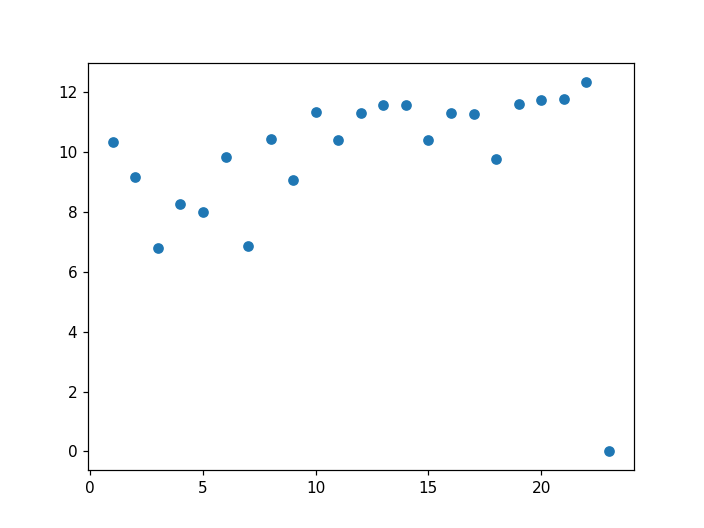

<IPython.core.display.Javascript object>


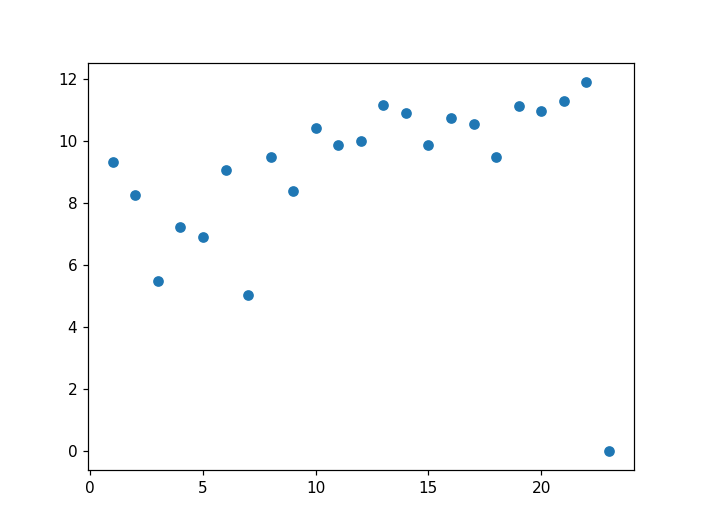

<IPython.core.display.Javascript object>


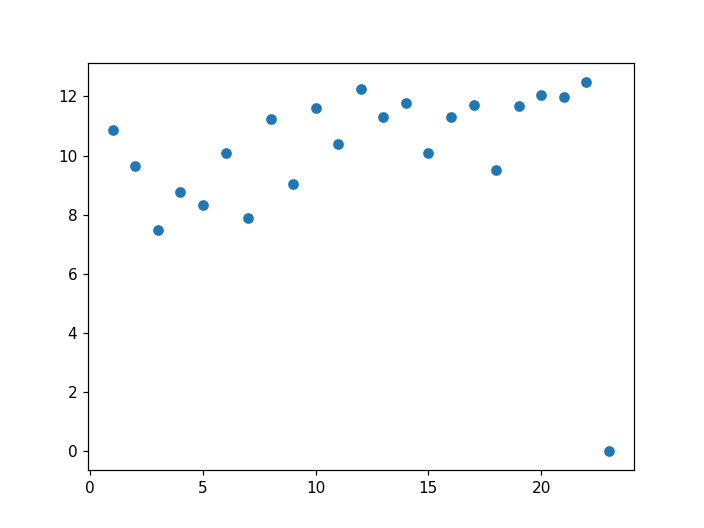

<IPython.core.display.Javascript object>


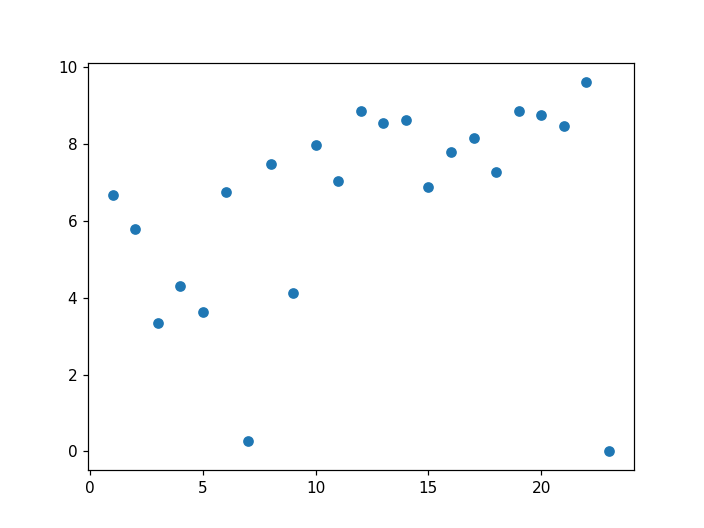

<IPython.core.display.Javascript object>


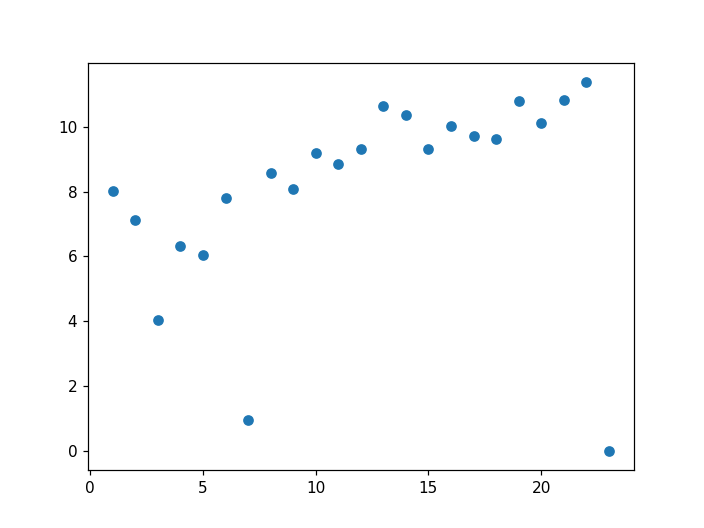

In [11]:

no_genericDB_data_dict = {}

# running generic_totals for 2011 to 2018 
for db in genericDB_files_dict.keys():
    x = []
    y = []
    count = 0 
    for index in level1_sockeys.keys():
        #print(index,db)
        if (len(index) > 0):
            fatal_totals = np.array([1,1,1,1,1,1,1,1])
            generic_totals = np.array([1,1,1,1,1,1,1,1])
            for key in level1_sockeys[index]:
                new_key = db+"_"+key
                if new_key in genericDB_dict.keys():
                    #print(genericDB_dict[key][0])
                    if new_key in fatalDB_dict.keys():
                        fatal_totals = fatal_totals + np.array(fatalDB_dict[key][0])
                    generic_totals = generic_totals + np.array(genericDB_dict[new_key][0])
                    #print(key,genericDB_dict[key])
                else:
                    no_genericDB_data_dict.setdefault(key, []).append(0)
                    #print("No genericDB data for ", key)  
                    
            category = soc_names[str(index)+"0000"]
            relative_totals = fatal_totals / generic_totals
            #print(db+" - "+index,category,relative_totals)
            
            count=count+1
            x.append(count)
            y.append(-1*math.log(np.mean(relative_totals)))
            
            #plt.figure(str(db)+"\t"+str(category))
            
    plt.figure(str(db)+", mean per SOC code level 1")
    plt.plot(x,y,'o')
    plt.show()

## Scatter plot level 6 RELATIVE average count of DATABASE data for soc groups

<IPython.core.display.Javascript object>


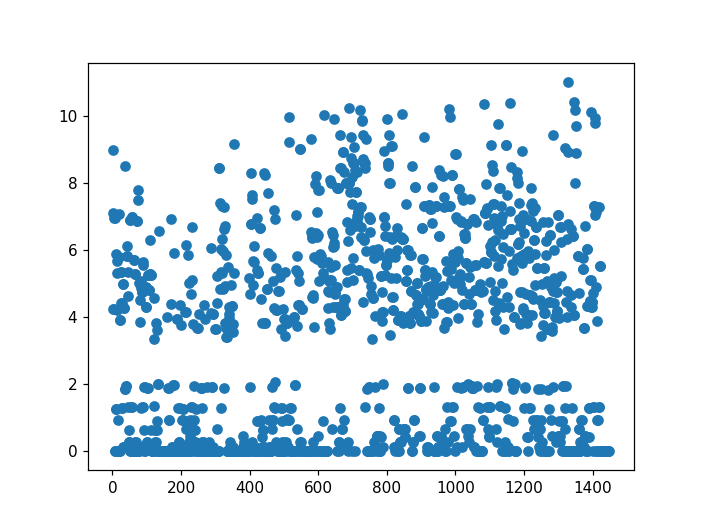

<IPython.core.display.Javascript object>


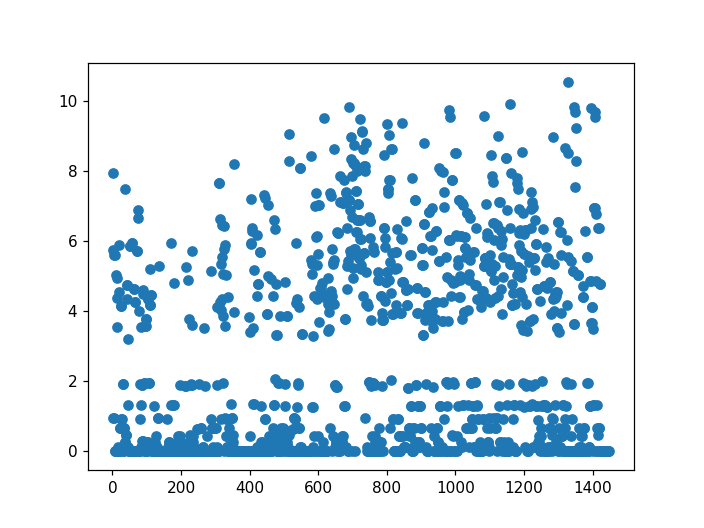

<IPython.core.display.Javascript object>


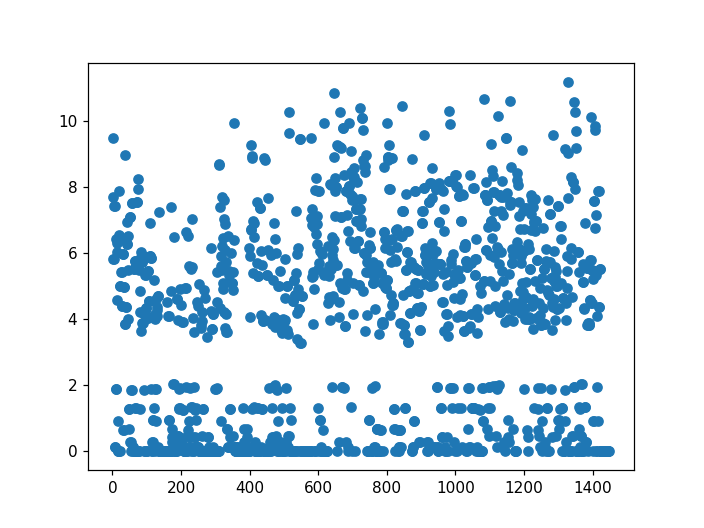

<IPython.core.display.Javascript object>


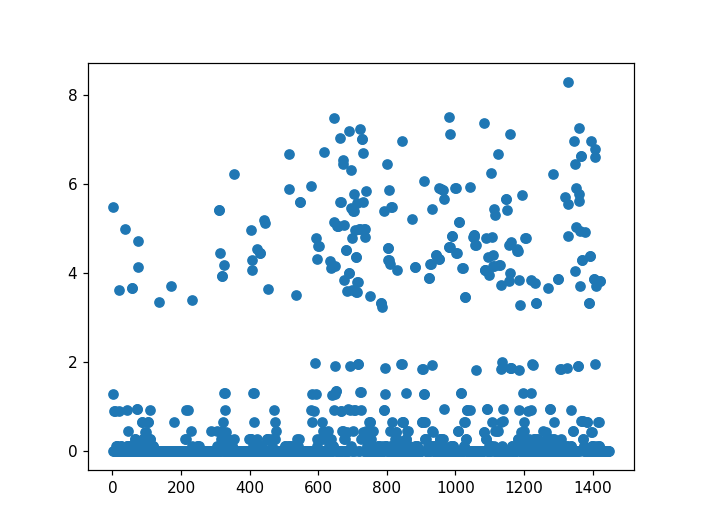

<IPython.core.display.Javascript object>


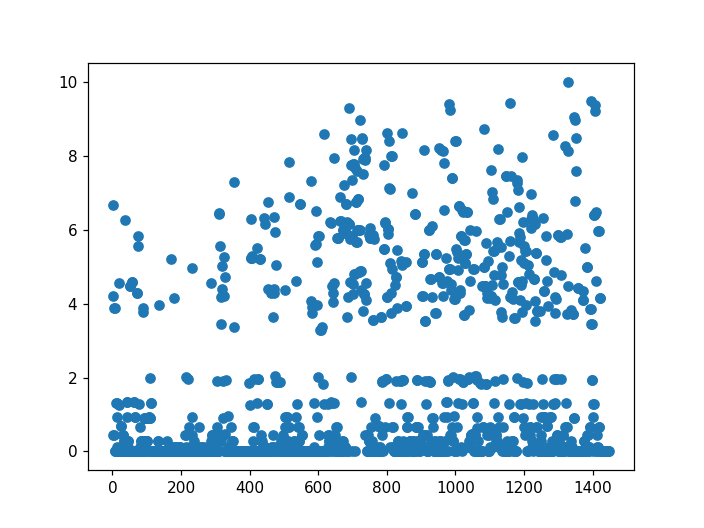

In [12]:

no_genericDB_data_dict = {}

# running generic_totals for 2011 to 2018
for db in genericDB_files_dict.keys():
    x = []
    y = []
    count = 0 
    for index in level3_sockeys.keys():
        if (len(index) > 0):
            fatal_totals = np.array([1,1,1,1,1,1,1,1])
            generic_totals = np.array([1,1,1,1,1,1,1,1])
            for key in level3_sockeys[index]:
                new_key = db+"_"+key
                if new_key in genericDB_dict.keys():
                    #print(genericDB_dict[key][0])
                    if new_key in fatalDB_dict.keys():
                        fatal_totals = fatal_totals + np.array(fatalDB_dict[key][0])
                    generic_totals = generic_totals + np.array(genericDB_dict[new_key][0])
                    #print(key,genericDB_dict[key])
                else:
                    no_genericDB_data_dict.setdefault(key, []).append(0)
                    #print("No genericDB data for ", key)
                    
            category = soc_names[str(index)]
            relative_totals = fatal_totals / generic_totals
            #print(db+"\t"+index,category,relative_totals)    
            
            count=count+1
            x.append(count)
            y.append(-1*math.log(np.mean(relative_totals)))
            
            #plt.figure(str(db)+"\t"+str(category))
            
    plt.figure(str(db) + ", mean per SOC code level 6")
    plt.plot(x,y,'o')
    plt.show()

In [25]:
print(genericDB_files_dict.keys())

dict_keys(['NF_GENDER_F', 'NF_GENDER_M', 'NF_GENDER_NR'])
